In [1]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, auc, roc_auc_score

In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [4]:
sample = pd.read_csv("sample_submission.csv")

In [5]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
sample

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842
...,...,...,...
233594,100,1006036,P00118942
233595,100,1006036,P00254642
233596,100,1006036,P00031842
233597,100,1006037,P00124742


In [8]:
train.shape , test.shape

((550068, 12), (233599, 11))

In [9]:
data = pd.concat([train,test])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,783667.0,1.003029e+06,1727.266668,1000001.0,1001519.0,1003075.0,1004478.0,1006040.0
Occupation,783667.0,8.079300e+00,6.522206,0.0,2.0,7.0,14.0,20.0
Marital_Status,783667.0,4.097774e-01,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,5.366196e+00,3.878160,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,9.844506e+00,5.089093,2.0,5.0,9.0,15.0,18.0
Product_Category_3,237858.0,1.266860e+01,4.125510,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [12]:
data.duplicated().sum()

0

In [13]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [14]:
data.isna().sum()/data.shape[0]

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.313886
Product_Category_3            0.696481
Purchase                      0.298085
dtype: float64

In [15]:
data.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023976,0.020276,0.004568,0.002291,0.002490,0.004716
Occupation,-0.023976,1.000000,0.023563,-0.008441,-0.000773,0.010450,0.020833
Marital_Status,0.020276,0.023563,1.000000,0.019579,0.017131,0.018471,-0.000463
Product_Category_1,0.004568,-0.008441,0.019579,1.000000,0.540426,0.228299,-0.343703
Product_Category_2,0.002291,-0.000773,0.017131,0.540426,1.000000,0.543578,-0.209918
Product_Category_3,0.002490,0.010450,0.018471,0.228299,0.543578,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [16]:
data = data.drop(columns="Product_Category_3")
data = data.reset_index(drop=True)

In [17]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [18]:
data['User_ID'].value_counts()

1001680    1468
1004277    1384
1001941    1286
1001181    1230
1000889    1204
           ... 
1000708      13
1005117      13
1000341      13
1002037      13
1005804      13
Name: User_ID, Length: 5891, dtype: int64

In [19]:
data['Product_ID'].value_counts()

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00299742       1
P00013542       1
P00065942       1
P00077542       1
P00156942       1
Name: Product_ID, Length: 3677, dtype: int64

In [20]:
data['Gender'].value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

In [21]:
data['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [22]:
data['Age']=data['Age'].replace({"55+":"55"})

In [23]:
data['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55        30579
0-17      21334
Name: Age, dtype: int64

In [24]:
def check_int_convert(x):
    tok = x.split("-")
    if (len(tok))==2:
        return (int(tok[0]) + int(tok[1]))/2
    else:
        return float(x)


In [25]:
data["Age"] = data["Age"].apply(check_int_convert)

In [26]:
data['Age'].value_counts()

30.5    313015
40.5    156724
21.5    141953
48.0     65278
53.0     54784
55.0     30579
8.5      21334
Name: Age, dtype: int64

In [27]:
data['Age'] = data['Age'].astype('float')

In [28]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,8.5,10,A,2,0,3,NaN,8370.0
1,1000001,P00248942,F,8.5,10,A,2,0,1,6.0,15200.0
2,1000001,P00087842,F,8.5,10,A,2,0,12,NaN,1422.0
3,1000001,P00085442,F,8.5,10,A,2,0,12,14.0,1057.0
4,1000002,P00285442,M,55.0,16,C,4+,0,8,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,30.5,15,B,4+,1,8,NaN,NaN
783663,1006036,P00254642,F,30.5,15,B,4+,1,5,8.0,NaN
783664,1006036,P00031842,F,30.5,15,B,4+,1,1,5.0,NaN
783665,1006037,P00124742,F,48.0,1,C,4+,0,10,16.0,NaN


In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,783667.0,1.003029e+06,1727.266668,1000001.0,1001519.0,1003075.0,1004478.0,1006040.0
Age,783667.0,3.425734e+01,10.865187,8.5,30.5,30.5,40.5,55.0
Occupation,783667.0,8.079300e+00,6.522206,0.0,2.0,7.0,14.0,20.0
Marital_Status,783667.0,4.097774e-01,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,5.366196e+00,3.878160,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,9.844506e+00,5.089093,2.0,5.0,9.0,15.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [30]:
data['Occupation'].value_counts()

4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64

In [31]:
data['City_Category'].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

In [32]:
data['Stay_In_Current_City_Years'].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [33]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].replace({"4+":"4"})

In [34]:
data['Stay_In_Current_City_Years'].value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [35]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype('int')

In [36]:
data["Marital_Status"].value_counts()

0    462538
1    321129
Name: Marital_Status, dtype: int64

In [37]:
data["Product_Category_1"].value_counts()

5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: Product_Category_1, dtype: int64

In [38]:
data["Product_Category_2"].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [39]:
data["Product_Category_2"].isna().sum()

245982

C:\Users\Akshaiya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2'>

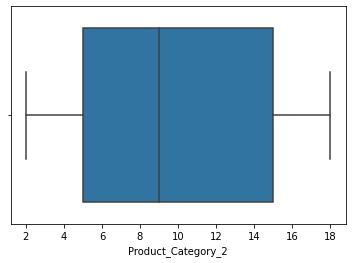

In [40]:
sns.boxplot(data['Product_Category_2'])

In [41]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0])

In [42]:
data["Product_Category_2"].isna().sum()

0

In [43]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Purchase                      233599
dtype: int64

In [44]:
data.duplicated().sum()

0

In [45]:
data.corr()

,User_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
User_ID,1.000000,0.039815,-0.023976,-0.030000,0.020276,0.004568,0.002545,0.004716
Age,0.039815,1.000000,0.090487,-0.004101,0.316687,0.059203,0.042686,0.016542
Occupation,-0.023976,0.090487,1.000000,0.028488,0.023563,-0.008441,0.001501,0.020833
Stay_In_Current_City_Years,-0.030000,-0.004101,0.028488,1.000000,-0.012871,-0.003518,-0.000081,0.005422
Marital_Status,0.020276,0.316687,0.023563,-0.012871,1.000000,0.019579,0.012192,-0.000463
Product_Category_1,0.004568,0.059203,-0.008441,-0.003518,0.019579,1.000000,0.286502,-0.343703
Product_Category_2,0.002545,0.042686,0.001501,-0.000081,0.012192,0.286502,1.000000,-0.128651
Purchase,0.004716,0.016542,0.020833,0.005422,-0.000463,-0.343703,-0.128651,1.000000


In [46]:
num_col = data.select_dtypes(include=np.number)

In [47]:
num_col

,User_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,8.5,10,2,0,3,8.0,8370.0
1,1000001,8.5,10,2,0,1,6.0,15200.0
2,1000001,8.5,10,2,0,12,8.0,1422.0
3,1000001,8.5,10,2,0,12,14.0,1057.0
4,1000002,55.0,16,4,0,8,8.0,7969.0
...,...,...,...,...,...,...,...,...
783662,1006036,30.5,15,4,1,8,8.0,NaN
783663,1006036,30.5,15,4,1,5,8.0,NaN
783664,1006036,30.5,15,4,1,1,5.0,NaN
783665,1006037,48.0,1,4,0,10,16.0,NaN


In [55]:
cat_col = data.select_dtypes(exclude=np.number).drop(columns=['Product_ID'])


In [56]:
cat_col

,Gender,City_Category
0,F,A
1,F,A
2,F,A
3,F,A
4,M,C
...,...,...
783662,F,B
783663,F,B
783664,F,B
783665,F,C


In [57]:
cat_col_processed = pd.get_dummies(cat_col)

In [58]:
cat_col_processed

,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,1,0,1,0,0
1,1,0,1,0,0
2,1,0,1,0,0
3,1,0,1,0,0
4,0,1,0,0,1
...,...,...,...,...,...
783662,1,0,0,1,0
783663,1,0,0,1,0
783664,1,0,0,1,0
783665,1,0,0,0,1


In [62]:
scale = StandardScaler()
num_col_scaled = pd.DataFrame(scale.fit_transform(num_col.drop(columns=["User_ID","Marital_Status","Purchase"])),columns=num_col.drop(columns=["User_ID","Marital_Status","Purchase"]).columns)

In [63]:
num_col_scaled

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2
0,-2.370632,0.294486,0.109989,-0.610134,-0.294215
1,-2.370632,0.294486,0.109989,-1.125843,-0.759177
2,-2.370632,0.294486,0.109989,1.710556,-0.294215
3,-2.370632,0.294486,0.109989,1.710556,1.100672
4,1.909095,1.214421,1.661833,0.679138,-0.294215
...,...,...,...,...,...
783662,-0.345815,1.061099,1.661833,0.679138,-0.294215
783663,-0.345815,1.061099,1.661833,-0.094425,-0.294215
783664,-0.345815,1.061099,1.661833,-1.125843,-0.991658
783665,1.264835,-1.085416,1.661833,1.194847,1.565635


In [82]:
data_prerocessed = pd.concat([cat_col_processed,num_col_scaled, num_col[["User_ID","Marital_Status","Purchase"]],data["Product_ID"]],axis = 1)

In [83]:
data_prerocessed

,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,User_ID,Marital_Status,Purchase,Product_ID
0,1,0,1,0,0,-2.370632,0.294486,0.109989,-0.610134,-0.294215,1000001,0,8370.0,P00069042
1,1,0,1,0,0,-2.370632,0.294486,0.109989,-1.125843,-0.759177,1000001,0,15200.0,P00248942
2,1,0,1,0,0,-2.370632,0.294486,0.109989,1.710556,-0.294215,1000001,0,1422.0,P00087842
3,1,0,1,0,0,-2.370632,0.294486,0.109989,1.710556,1.100672,1000001,0,1057.0,P00085442
4,0,1,0,0,1,1.909095,1.214421,1.661833,0.679138,-0.294215,1000002,0,7969.0,P00285442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1,0,0,1,0,-0.345815,1.061099,1.661833,0.679138,-0.294215,1006036,1,NaN,P00118942
783663,1,0,0,1,0,-0.345815,1.061099,1.661833,-0.094425,-0.294215,1006036,1,NaN,P00254642
783664,1,0,0,1,0,-0.345815,1.061099,1.661833,-1.125843,-0.991658,1006036,1,NaN,P00031842
783665,1,0,0,0,1,1.264835,-1.085416,1.661833,1.194847,1.565635,1006037,0,NaN,P00124742


In [84]:
train_preprocessed = data_prerocessed[data_prerocessed['Purchase'].notna()]

In [85]:
test_preprocessed =  data_prerocessed[data_prerocessed['Purchase'].isna()]

In [86]:
train_preprocessed

,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,User_ID,Marital_Status,Purchase,Product_ID
0,1,0,1,0,0,-2.370632,0.294486,0.109989,-0.610134,-0.294215,1000001,0,8370.0,P00069042
1,1,0,1,0,0,-2.370632,0.294486,0.109989,-1.125843,-0.759177,1000001,0,15200.0,P00248942
2,1,0,1,0,0,-2.370632,0.294486,0.109989,1.710556,-0.294215,1000001,0,1422.0,P00087842
3,1,0,1,0,0,-2.370632,0.294486,0.109989,1.710556,1.100672,1000001,0,1057.0,P00085442
4,0,1,0,0,1,1.909095,1.214421,1.661833,0.679138,-0.294215,1000002,0,7969.0,P00285442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,0,1,0,1,0,1.725020,0.754454,-0.665933,3.773391,-0.294215,1006033,1,368.0,P00372445
550064,1,0,0,0,1,-0.345815,-1.085416,0.885911,3.773391,-0.294215,1006035,0,371.0,P00375436
550065,1,0,0,1,0,-0.345815,1.061099,1.661833,3.773391,-0.294215,1006036,1,137.0,P00375436
550066,1,0,0,0,1,1.909095,-1.085416,0.109989,3.773391,-0.294215,1006038,0,365.0,P00375436


In [87]:
test_preprocessed

,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,User_ID,Marital_Status,Purchase,Product_ID
550068,0,1,0,1,0,1.264835,-0.165481,0.109989,-1.125843,0.403229,1000004,1,NaN,P00128942
550069,0,1,0,0,1,-0.345815,1.367744,-1.441855,-0.610134,-0.991658,1000009,0,NaN,P00113442
550070,1,0,0,1,0,0.574556,-1.085416,1.661833,-0.094425,1.100672,1000010,1,NaN,P00288442
550071,1,0,0,1,0,0.574556,-1.085416,1.661833,-0.352280,-0.061733,1000010,1,NaN,P00145342
550072,1,0,0,0,1,-0.345815,-1.085416,-0.665933,-0.352280,-0.991658,1000011,0,NaN,P00053842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1,0,0,1,0,-0.345815,1.061099,1.661833,0.679138,-0.294215,1006036,1,NaN,P00118942
783663,1,0,0,1,0,-0.345815,1.061099,1.661833,-0.094425,-0.294215,1006036,1,NaN,P00254642
783664,1,0,0,1,0,-0.345815,1.061099,1.661833,-1.125843,-0.991658,1006036,1,NaN,P00031842
783665,1,0,0,0,1,1.264835,-1.085416,1.661833,1.194847,1.565635,1006037,0,NaN,P00124742


In [88]:
train_preproceed.to_csv("train_preprocessed.csv", index = False)
test_preproceed.to_csv("test_preprocessed.csv", index = False)
